####Learning VGG 16 and VGG 19 using Keras


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
pwd


'/content'

In [ ]:
from zipfile import ZipFile 
file_name = "Datasets.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
ls

Datasets/  Datasets.zip  sample_data/


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Datasets/train'
valid_path = '/content/Datasets/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/Datasets/Train/*')

In [ ]:
folders

['/content/Datasets/Train/audi',
 '/content/Datasets/Train/mercedes',
 '/content/Datasets/Train/lamborghini']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 58 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 15s 7s/step - loss: 8.2684 - accuracy: 0.2969 - val_loss: 7.6915 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 14s 7s/step - loss: 6.3989 - accuracy: 0.3281 - val_loss: 2.8853 - val_accuracy: 0.3793
Epoch 3/50
2/2 [==============================] - 14s 7s/step - loss: 5.5652 - accuracy: 0.4062 - val_loss: 3.3666 - val_accuracy: 0.3448
Epoch 4/50
2/2 [==============================] - 13s 7s/step - loss: 4.8984 - accuracy: 0.4531 - val_loss: 2.3983 - val_accuracy: 0.5345
Epoch 5/50
2/2 [==============================] - 14s 7s/step - loss: 1.8769 - accuracy: 0.5625 - val_loss: 4.1398 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 13s 7s/step - loss: 2.8868 - accuracy: 0.4219 - val_loss: 4.4568 - val_accuracy: 0.3793
Epoch 7/50
2/2 [==============================] - 14s 7s/step - loss: 2.8676 - accuracy: 0.5625 

In [ ]:
r.history

{'accuracy': [0.296875,
  0.328125,
  0.40625,
  0.453125,
  0.5625,
  0.421875,
  0.5625,
  0.6875,
  0.46875,
  0.625,
  0.625,
  0.5625,
  0.640625,
  0.671875,
  0.640625,
  0.546875,
  0.75,
  0.703125,
  0.734375,
  0.6875,
  0.796875,
  0.796875,
  0.84375,
  0.84375,
  0.859375,
  0.859375,
  0.84375,
  0.890625,
  0.875,
  0.875,
  0.921875,
  0.828125,
  0.875,
  0.9375,
  0.90625,
  0.890625,
  0.90625,
  0.921875,
  0.953125,
  0.96875,
  0.953125,
  0.953125,
  0.984375,
  0.890625,
  0.953125,
  0.96875,
  0.90625,
  0.953125,
  0.953125,
  0.9375],
 'loss': [8.268375396728516,
  6.398877143859863,
  5.565245151519775,
  4.898437976837158,
  1.8768614530563354,
  2.886834144592285,
  2.8676040172576904,
  0.9030011892318726,
  2.262115955352783,
  1.314584493637085,
  1.4665305614471436,
  1.4065383672714233,
  1.12925124168396,
  1.2227747440338135,
  0.813592791557312,
  1.0999174118041992,
  0.7398021221160889,
  0.9282553195953369,
  0.6525789499282837,
  0.7618900537

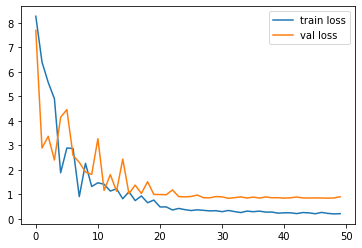

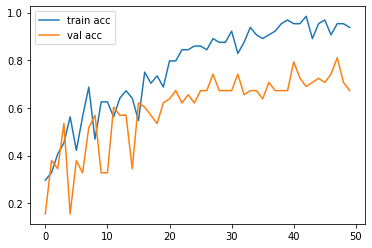

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[2.29187906e-01, 1.90838739e-01, 5.79973400e-01],
       [4.01133262e-02, 6.40301049e-01, 3.19585711e-01],
       [3.99373204e-01, 5.54438055e-01, 4.61887643e-02],
       [1.29994810e-01, 4.00536448e-01, 4.69468772e-01],
       [6.67680264e-01, 1.03065528e-01, 2.29254186e-01],
       [1.45149979e-05, 2.39827175e-04, 9.99745667e-01],
       [9.66658890e-01, 1.11558931e-02, 2.21852250e-02],
       [6.61831647e-02, 3.29053998e-01, 6.04762793e-01],
       [1.28643915e-01, 1.35883233e-02, 8.57767701e-01],
       [7.35188276e-02, 6.54103339e-01, 2.72377789e-01],
       [9.26177111e-03, 2.21362375e-02, 9.68602061e-01],
       [3.50845186e-03, 9.89582658e-01, 6.90893689e-03],
       [7.17767254e-02, 9.91261005e-03, 9.18310642e-01],
       [1.51866555e-01, 2.88187951e-01, 5.59945464e-01],
       [1.70710646e-02, 9.30150926e-01, 5.27780615e-02],
       [1.23479422e-05, 8.49528529e-04, 9.99138117e-01],
       [5.59200309e-02, 5.18676817e-01, 4.25403178e-01],
       [4.84471023e-02, 3.37276

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 0,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')


In [ ]:
img=image.load_img('Datasets/Test/lamborghini/10.jpg',target_size=(224,224))


In [ ]:
x=image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [ ]:
x.shape


(224, 224, 3)

In [ ]:
x=x/255


In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)


array([[0.08990441, 0.27019805, 0.6398975 ]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)


In [ ]:
a==1

array([False])